## ROLLING STATISTICS

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data.csv")
df.head()
#              [open(i-1)-open(i-2)]*100
#  return(i) = --------------------------
#                    open(i-1)

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),return
0,18439.9,18458.30,18209.35,18266.6,371276478,28968.42,-0.310197
1,18382.7,18384.20,18048.00,18178.1,365902008,30839.79,-0.826864
2,18230.7,18314.25,18034.35,18114.9,324748084,26938.88,-0.006582
3,18229.5,18241.40,17968.50,18125.4,418703647,34572.34,-0.411421
4,18154.5,18310.45,18099.30,18268.4,341377869,29764.61,0.778595


In [3]:
df.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),return
count,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000
mean,17109.645363,17206.324194,16984.340323,17098.228427,2.891735e+08,23067.856169,-0.418518
std,719.033564,703.646462,715.802795,710.378532,7.616647e+07,5620.954568,6.461809
min,15272.650000,15382.500000,15183.400000,15293.500000,4.852086e+07,3637.060000,-100.000000
25%,16589.437500,16702.812500,16476.450000,16612.137500,2.434464e+08,19411.805000,-0.758431
50%,17235.325000,17340.500000,17097.475000,17222.375000,2.742562e+08,21952.840000,0.037893
75%,17619.150000,17710.525000,17489.900000,17622.787500,3.222071e+08,25432.862500,0.798824
max,18439.900000,18458.300000,18228.750000,18308.100000,6.516136e+08,52929.350000,4.223784


In [4]:
df.drop(247,axis=0,inplace=True)

This is the outlier point which scales out too much (identified during plotting)

### Rolling Mean

Text(0.5, 1.0, 'High')

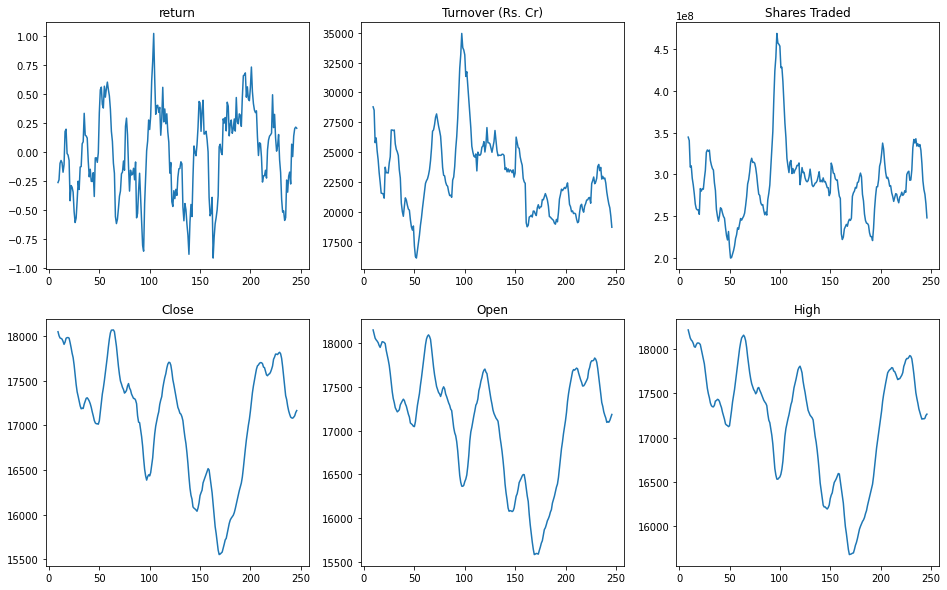

In [52]:
fig, ax = plt.subplots(2, 3,figsize=(16,10))

# return
rolling_return = df['return'].rolling(window=10).mean()
ax[0,0].plot(rolling_return)
ax[0,0].set_title("return")


# Turnover (Rs. Cr)
rolling_return = df['Turnover (Rs. Cr)'].rolling(window=10).mean()
ax[0,1].plot(rolling_return)
ax[0,1].set_title("Turnover (Rs. Cr)")

# Shares Traded
rolling_return = df['Shares Traded'].rolling(window=10).mean()
ax[0,2].plot(rolling_return)
ax[0,2].set_title("Shares Traded")

# Close
rolling_return = df['Close'].rolling(window=10).mean()
ax[1,0].plot(rolling_return)
ax[1,0].set_title("Close")

# Open
rolling_return = df['Open'].rolling(window=10).mean()
ax[1,1].plot(rolling_return)
ax[1,1].set_title("Open")

# High
rolling_return = df['High'].rolling(window=10).mean()
ax[1,2].plot(rolling_return)
ax[1,2].set_title("High")

### Rolling Standard Deviation

Text(0.5, 1.0, 'High')

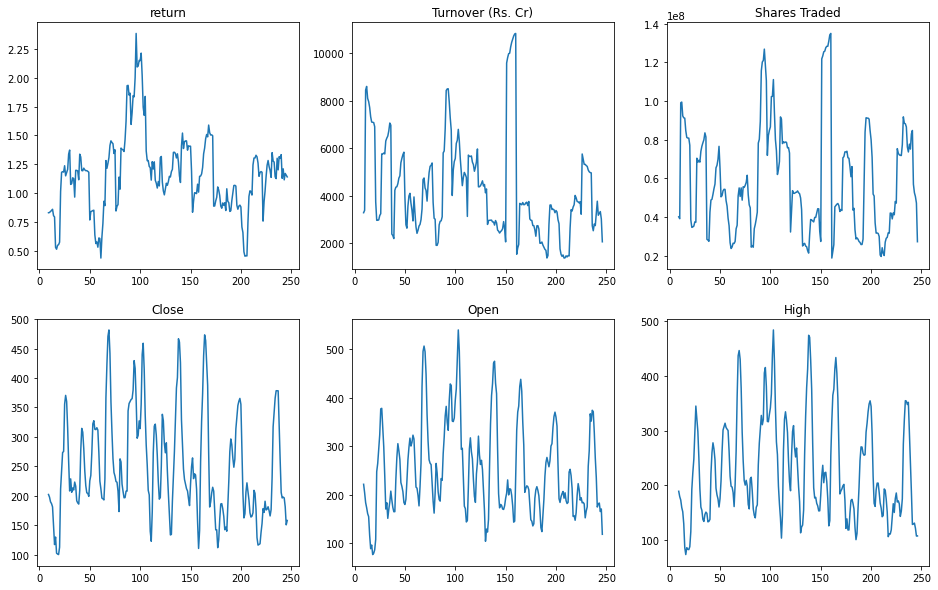

In [53]:
fig, ax = plt.subplots(2, 3,figsize=(16,10))

# return
rolling_return = df['return'].rolling(window=10).std()
ax[0,0].plot(rolling_return)
ax[0,0].set_title("return")


# Turnover (Rs. Cr)
rolling_return = df['Turnover (Rs. Cr)'].rolling(window=10).std()
ax[0,1].plot(rolling_return)
ax[0,1].set_title("Turnover (Rs. Cr)")

# Shares Traded
rolling_return = df['Shares Traded'].rolling(window=10).std()
ax[0,2].plot(rolling_return)
ax[0,2].set_title("Shares Traded")

# Close
rolling_return = df['Close'].rolling(window=10).std()
ax[1,0].plot(rolling_return)
ax[1,0].set_title("Close")

# Open
rolling_return = df['Open'].rolling(window=10).std()
ax[1,1].plot(rolling_return)
ax[1,1].set_title("Open")

# High
rolling_return = df['High'].rolling(window=10).std()
ax[1,2].plot(rolling_return)
ax[1,2].set_title("High")

## ADF TEST

In [54]:
from statsmodels.tsa.stattools import adfuller 

In [68]:
for col in ['return','Turnover (Rs. Cr)','Shares Traded','Close','Open','High']:
    adf = adfuller(df[col])
    print("\n\nFeature : "+col+"\n")
    print("Statistic Test     : " , adf[0])
    print("p-value            : " , adf[1])
    print("# n_lags           : " , adf[2])
    print("No of observation  : " , adf[3])
    for key,value in adf[4].items():
        print(f"critical value {key}  : {value}")
    if adf[1]>0.05:
        print("Result              : Non-Stationary")
    else:
        print("Result              : Stationary")



Feature : return

Statistic Test     :  -16.59926454819485
p-value            :  1.770472156053917e-29
# n_lags           :  0
No of observation  :  246
critical value 1%  : -3.457215237265747
critical value 5%  : -2.873361841566324
critical value 10%  : -2.5730700760129555
Result              : Stationary


Feature : Turnover (Rs. Cr)

Statistic Test     :  -5.0372273040496856
p-value            :  1.8720631470024542e-05
# n_lags           :  2
No of observation  :  244
critical value 1%  : -3.457437824930831
critical value 5%  : -2.873459364726563
critical value 10%  : -2.573122099570008
Result              : Stationary


Feature : Shares Traded

Statistic Test     :  -6.449452272600041
p-value            :  1.536421264064607e-08
# n_lags           :  1
No of observation  :  245
critical value 1%  : -3.4573260719088132
critical value 5%  : -2.873410402808354
critical value 10%  : -2.573095980841316
Result              : Stationary


Feature : Close

Statistic Test     :  -2.4686675